# Aprendizaje Automatico (CEIoT): Trabajo Practico N°2
## Alumno: Gonzalo Carreno



Vamos a trabajar con el dataset de vinos proveniente de [Kaggle](https://www.kaggle.com/datasets/rakeshrau/social-network-ads). El dataset contiene proviene con datos de campaña de publicidad en una red social. Se cuenta con variables de los usuarios que tuvieron sujetos a la campaña. Se busca poder predecir dado un usuario con datos socioseconomicos si va a comprar o no el producto. 



### 1. Lea el dataset como un DataFrame de Pandas. Realice un estudio de variables. Como se llaman y que están midiendo exactamente. Además, analice que tipo de variables son, cuál es el rango de estas variables y cómo se distribuyen (histograma). 

Se importan todas las librerias que usaremos y se realiza lectura del dataset como un DataFrame de Pandas.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Leemos el dataset
df = pd.read_csv("datasets/Social_Network_Ads.csv")

In [2]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


Los atributos del dataset son:
- User_ID: Identificador unico de cada persona
- Gender: Es el genero de la persona.
- Age: Edad de la persona. 
- EstimatedSalary: Salario

Y la columna a target es:
- Purchased: Contiene siendo 1 comprado y 0 no comprado.

De un analisis inicial se puede pensar que las columnas edad, genero  y salario estimado pueden ser claves para la determinacion de si el producto resulta o no comprado. Analicemos los parametros poblacionales del dataset.

In [3]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


Las edades van de 18 a 60 años, y los salarios de los 15k a los 150k.



Podemos ver si hay o no datos faltantes, asi como los tipos de dato de cada columna de la siguiente manera:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


Tenemos 2 columnas de tipo entero, 2 columnas de tipo flotante y 1 es una columna de strings.

Podemos ver que no hay datos nulos

In [5]:
print(len(df))
print(len(df.dropna()))

400
400


Como la columna `User ID` es una columna que identifica a los usuarios y no aporta un valor para el objetivo de determinar si un producto es o no comprado, la eliminamos inicialmente del dataset

In [6]:
df.drop(columns="User ID", inplace=True)

Analizando los histogramas de distribucion de edades y salarios, vemos que en edad tenemos una distribución uniforme hasta llegar a aproximadamente los 35 años, ahi estan la mayoria de los usuarios entre 35 y 45, luego tenemos en una distribución uniforme de edades hasta llegar a los 60 pero en menor cantidad de usuarios. Por otro lado, el salario, tenemos una distribución uniforme entre 25000 y 100000 y luego otra en mucho menor tamaño entre 100000 y 150000. Es decir, la mayoria de los usarios ganan entre 25000 y 100000.


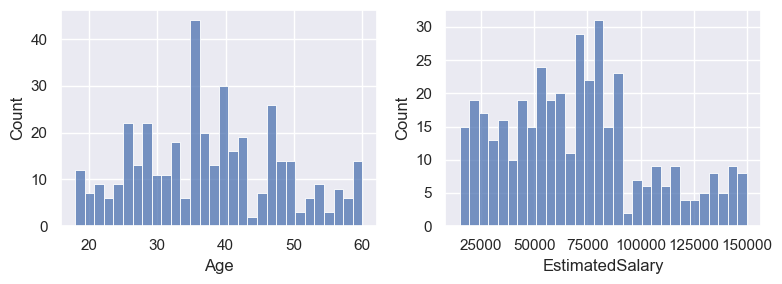

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
sns.histplot(data=df, x="Age", ax=ax[0], bins=30)
sns.histplot(data=df, x="EstimatedSalary", ax=ax[1], bins=30)
plt.tight_layout()
plt.show()

Viendo la distribucion de generos, vemos que en este dataset tenemos dos generos y estos presentan una distribución bastante pareja, siendo en proporcion mayor cantidad de mujeres que hombres en las compras.

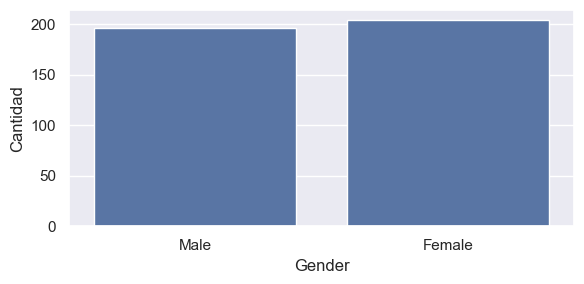

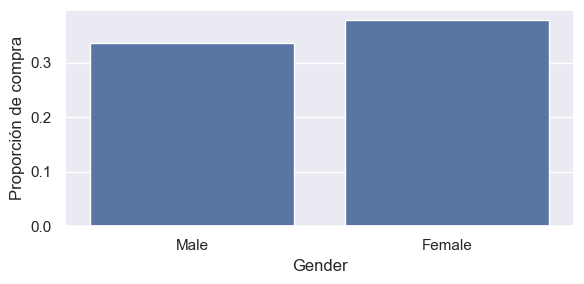

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
sns.countplot(data=df, x="Gender", ax=ax)
ax.set_ylabel("Cantidad")
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(6, 3))
sns.barplot(data=df, y="Purchased", x="Gender", errorbar=None)
ax.set_ylabel("Proporción de compra")
plt.tight_layout()
plt.show()

### 2. Genere gráficos de cajas de los diferentes atributos separando por clase (compro o no el producto). Entre los atributos, se observa alguna diferencia en lo gráficos de cajas?



Dado el grafico de caja de las demas variables, vemos que la edad es un atributo que marca muy fuerte quien compra o no el producto. Por otro lado, el salario estimado vemos que los que no compran tienen un salario menor y con menos variación.

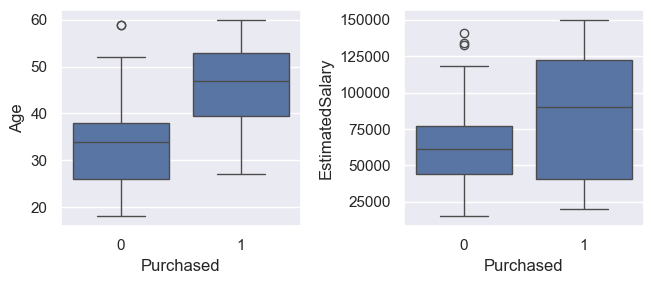

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(6.7, 3))
sns.boxplot(data=df, x="Purchased", y="Age", ax=ax[0])
sns.boxplot(data=df, x="Purchased", y="EstimatedSalary", ax=ax[1])
plt.tight_layout()
plt.show()


### 3. Analize las clases, estan balanceadas, o no? Qué clase nos parece mas importante de las dos?

In [10]:
df["Purchased"].value_counts(normalize=True)

Purchased
0    0.6425
1    0.3575
Name: proportion, dtype: float64

Un 65% aproximadamente no compro y 35% si compro. Lo cual es una buena distribución, no tenemos un gran desbalance de clases. 


### 4. Separe el dataset en entrenamiento y validación. Utilice 70%-30%.

Previo a esto vamos a transformar a la variable genero en numerica usando codificación dummy

In [11]:
final_df = pd.get_dummies(df, columns=["Gender"], drop_first=True)
final_df = final_df[['Age', 'EstimatedSalary', 'Gender_Male', 'Purchased']]
X = final_df.drop(columns="Purchased").values
y = final_df["Purchased"].values

In [12]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
sc_X = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train) 
X_test_scaled = sc_X.transform(X_test) 


### 5. Determine que métrica se va a usar para evaluar la calidad de los modelos. Tenga en cuenta el balanceo de clases, y que objetivo se busca tener (por ejemplo, queremos predecir las mayor cantidad de personas que compran a expensas de tener falsos positivos o tener mucha seguridad a la hora de decir que una persona compra a expensa de tener falsos negativos).



Queremos identificar con mayor precisión a aquellos usuarios que realizan compras en comparación con los que no. Aunque no subestimamos la importancia de los usuarios que no realizan compras, nuestra prioridad radica en comprender y caracterizar a los usuarios que sí adquieren el producto. Esto nos permitirá establecer perfiles socioeconómicos más sólidos para este grupo de interés.

Con este enfoque en mente, buscamos que el modelo sea altamente preciso al predecir las compras, ya que esto facilitará la construcción de perfiles socioeconómicos más confiables. Para evaluar la efectividad de nuestro modelo, planeamos utilizar la matriz de confusión, que proporciona una visión detallada de los resultados de la clasificación, y el puntaje F0.5, una métrica que da más peso a la precisión que a la recuperación.

La matriz de confusión organiza la evaluación del rendimiento en modelos de clasificación, destacando verdaderos y falsos positivos y negativos. Por otro lado, el puntaje F0.5 equilibra precisión y recuperación, otorgando mayor importancia a la precisión. Esta métrica es útil al buscar minimizar los falsos positivos, sin descartar por completo la recuperación.


### 6. Construya un modelo de regresión logística, el cual se intente predecir si una persona compró el producto o no.

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, fbeta_score

logistic = LogisticRegression(random_state=0)
logistic.fit(X_train_scaled, y_train)
y_pred = logistic.predict(X_test_scaled)



Visualizando la confusion matrix y cuantificando los valores de precision y recall:

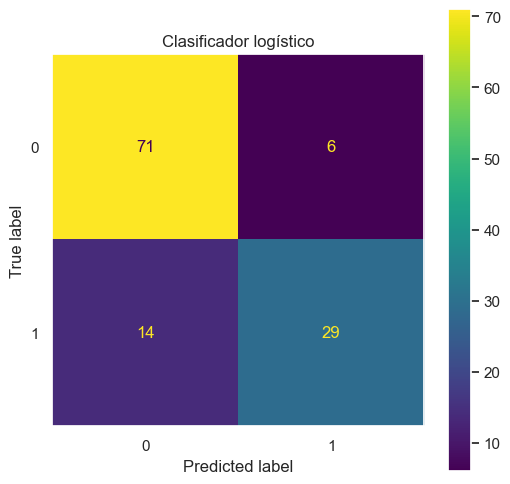

F0.5-score: 0.7923497267759563
Accuracy = 0.8333333333333334
Precision (TP/(TP+FP) 0.8285714285714286
Recall (TP/(TP+FN) 0.6744186046511628


In [14]:
cm_logistic = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_logistic,
                              display_labels=logistic.classes_)

fig, ax = plt.subplots(figsize=(6, 6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Clasificador logístico")
plt.show()

from sklearn.metrics import precision_recall_fscore_support , accuracy_score
accuracy = accuracy_score(y_test, y_pred)
precision_recall = precision_recall_fscore_support(y_test, y_pred, average='binary' )
f0_5_logistic = fbeta_score(y_test, y_pred, zero_division=0, beta=0.5)
print(f"F0.5-score: {f0_5_logistic}")
print(f'Accuracy = {accuracy}')
print(f'Precision (TP/(TP+FP) {precision_recall[0]}')
print(f'Recall (TP/(TP+FN) {precision_recall[1]}')

Podemos apreciar que el modelo anterior tiene un accuracy de un 83.33% con valores de Precision/Recall de 82% y 67.4%.

Ahora, para evaluar la calidad del modelo sin depender del valor umbral nos podemos basar en la curva ROC. Elijiendo un valor umbral optimo para AUC y re-entrenando el modelo con ese valor...

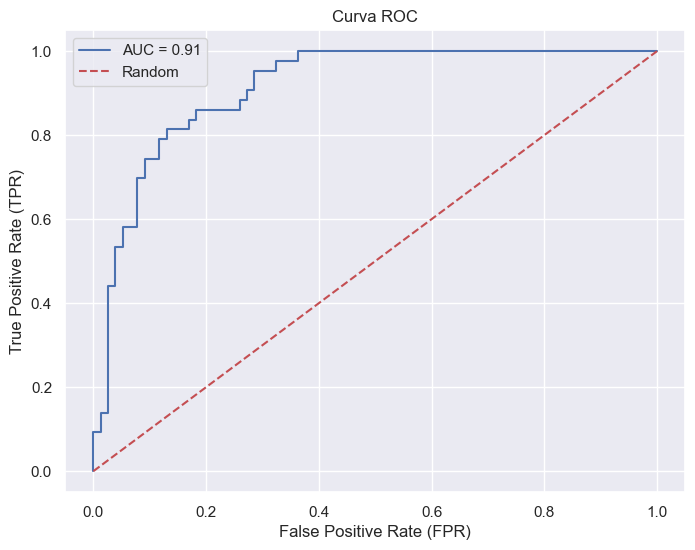

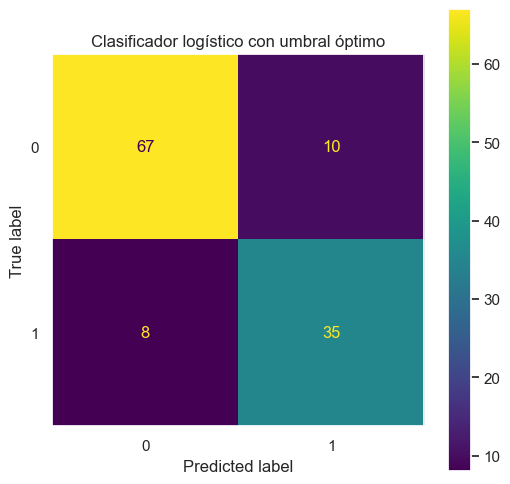

Umbral óptimo: 0.38164372121869966
F0.5-score: 0.7923497267759563
Accuracy = 0.85
Precision (TP/(TP+FP) 0.7777777777777778
Recall (TP/(TP+FN) 0.813953488372093


In [15]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = logistic.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

auc = roc_auc_score(y_test, y_prob)

# Umbral óptimo que maximiza la suma de sensibilidad y especificidad
optimal_threshold = thresholds[np.argmax(tpr - fpr)]

# Usando el umbral óptimo
y_pred_optimal = (y_prob >= optimal_threshold).astype(int)

# Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.show()


# Nueva matriz de confusión con el umbral óptimo
cm_optimal_threshold = confusion_matrix(y_test, y_pred_optimal)
disp_optimal_threshold = ConfusionMatrixDisplay(confusion_matrix=cm_optimal_threshold, display_labels=logistic.classes_)

fig, ax = plt.subplots(figsize=(6, 6))
ax.grid(False)
disp_optimal_threshold.plot(ax=ax)
ax.set_title("Clasificador logístico con umbral óptimo")
plt.show()

# Umbral óptimo
print(f'Umbral óptimo: {optimal_threshold}')

from sklearn.metrics import precision_recall_fscore_support , accuracy_score
n_accuracy = accuracy_score(y_test, y_pred_optimal)
n_precision_recall = precision_recall_fscore_support(y_test, y_pred_optimal, average='binary' )
n_f0_5_logistic = fbeta_score(y_test, y_pred, zero_division=0, beta=0.5)
print(f"F0.5-score: {n_f0_5_logistic}")
print(f'Accuracy = {n_accuracy}')
print(f'Precision (TP/(TP+FP) {n_precision_recall[0]}')
print(f'Recall (TP/(TP+FN) {n_precision_recall[1]}')

Podemos apreciar como el uso del valor umbral optimo logra mejorar no solo el accuracy del modelo, tambien sus parametros de Precision y Recall.

###  7. Construya un modelo de KNN, el cual se intente predecir si una persona compró el producto o no.

In [16]:
from sklearn.neighbors import KNeighborsClassifier

# Elegimos la distancia euclideana
classifier_knn_1 = KNeighborsClassifier(n_neighbors=1, metric="euclidean")
classifier_knn_3 = KNeighborsClassifier(n_neighbors=3, metric="euclidean")
classifier_knn_5 = KNeighborsClassifier(n_neighbors=5)
classifier_knn_13 = KNeighborsClassifier(n_neighbors=13)

# 2. Entrene los modelos con el set de entrenamiento.
classifier_knn_1.fit(X_train_scaled, y_train)
classifier_knn_3.fit(X_train_scaled, y_train)
classifier_knn_5.fit(X_train_scaled, y_train)
classifier_knn_13.fit(X_train_scaled, y_train)

# 3. Evalúe los modelos con la métrica de evaluación.
y_pred_knn_1 = classifier_knn_1.predict(X_test_scaled)
y_pred_knn_3 = classifier_knn_3.predict(X_test_scaled)
y_pred_knn_5 = classifier_knn_5.predict(X_test_scaled)
y_pred_knn_13 = classifier_knn_13.predict(X_test_scaled)

f0_5_knn_1 = fbeta_score(y_test, y_pred_knn_1, zero_division=0, beta=0.5)
f0_5_knn_3 = fbeta_score(y_test, y_pred_knn_3, zero_division=0, beta=0.5)
f0_5_knn_5 = fbeta_score(y_test, y_pred_knn_5, zero_division=0, beta=0.5)
f0_5_knn_13 = fbeta_score(y_test, y_pred_knn_13, zero_division=0, beta=0.5)

print(f"F0.5-score de KNN con 1 vecino: {f0_5_knn_1} \
    , Accuracy: {accuracy_score(y_test, y_pred_knn_1)} \
    , Precision: {precision_recall_fscore_support(y_test, y_pred_knn_1, average='binary' )[0]} \
    , Recall: {precision_recall_fscore_support(y_test, y_pred_knn_1, average='binary' )[1]}")
print(f"F0.5-score de KNN con 3 vecinos: {f0_5_knn_3}) \
    , Accuracy: {accuracy_score(y_test, y_pred_knn_3)} \
    , Precision: {precision_recall_fscore_support(y_test, y_pred_knn_3, average='binary' )[0]} \
    , Recall: {precision_recall_fscore_support(y_test, y_pred_knn_3, average='binary' )[1]}")
print(f"F0.5-score de KNN con 5 vecinos: {f0_5_knn_5}) \
    , Accuracy: {accuracy_score(y_test, y_pred_knn_5)} \
    , Precision: {precision_recall_fscore_support(y_test, y_pred_knn_5, average='binary' )[0]} \
    , Recall: {precision_recall_fscore_support(y_test, y_pred_knn_5, average='binary' )[1]}")
print(f"F0.5-score de KNN con 13 vecinos: {f0_5_knn_13}) \
    , Accuracy: {accuracy_score(y_test, y_pred_knn_13)} \
    , Precision: {precision_recall_fscore_support(y_test, y_pred_knn_13, average='binary' )[0]} \
    , Recall: {precision_recall_fscore_support(y_test, y_pred_knn_13, average='binary' )[1]}")



F0.5-score de KNN con 1 vecino: 0.8454106280193237     , Accuracy: 0.8833333333333333     , Precision: 0.8536585365853658     , Recall: 0.813953488372093
F0.5-score de KNN con 3 vecinos: 0.8604651162790697)     , Accuracy: 0.9     , Precision: 0.8604651162790697     , Recall: 0.8604651162790697
F0.5-score de KNN con 5 vecinos: 0.8744394618834082)     , Accuracy: 0.9166666666666666     , Precision: 0.8666666666666667     , Recall: 0.9069767441860465
F0.5-score de KNN con 13 vecinos: 0.8675799086757993)     , Accuracy: 0.9083333333333333     , Precision: 0.8636363636363636     , Recall: 0.8837209302325582


Vemos que el mejor modelo de los cuatro es el de **5 vecinos**. 

Obtengamos la matriz de confusión de este modelo:

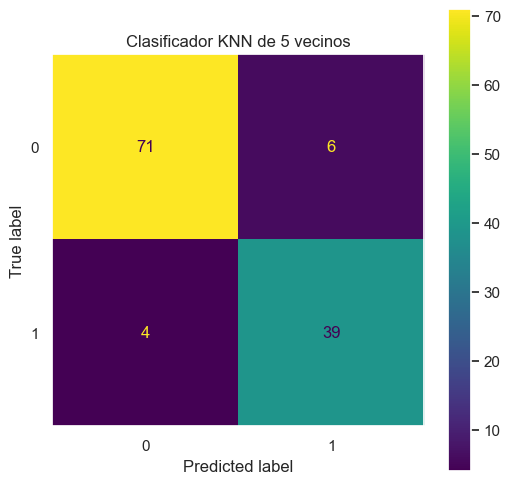

Accuracy = 0.9166666666666666
Precision (TP/(TP+FP) 0.8666666666666667
Recall (TP/(TP+FN) 0.9069767441860465


In [17]:
cm_knn = confusion_matrix(y_test, y_pred_knn_5)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=classifier_knn_5.classes_)

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Clasificador KNN de 5 vecinos")
plt.show()



from sklearn.metrics import precision_recall_fscore_support , accuracy_score
n_accuracy = accuracy_score(y_test, y_pred_knn_5)
n_precision_recall = precision_recall_fscore_support(y_test, y_pred_knn_5, average='binary' )
print(f'Accuracy = {n_accuracy}')
print(f'Precision (TP/(TP+FP) {n_precision_recall[0]}')
print(f'Recall (TP/(TP+FN) {n_precision_recall[1]}')

### 8: Compare el mejor modelo de regresión logistica y el mejor modelo de KNN. Cual fue el mejor modelo? Discuta los resultados.

El modelo de regresión logística obtuvo un puntaje F0.5 de aproximadamente 0.79 en el conjunto de prueba. La matriz de confusión luego de la optimizacion del umbral revela que el modelo clasificó correctamente 67 instancias como verdaderos negativos (TN), 35 instancias como verdaderos positivos (TP), 8 instancias como falsos positivos (FP) y 10 instancias como falsos negativos (FN).
El umbral óptimo determinado automaticamente es: 0.38164372121869966, lo cual indica que el optimizador del modelo prefiere categorizar positivos (compras) que negativos (no compras) y de esta manera logra maximizar su accuracy, precision y recall. a los valores Accuracy = 85%, Precision= 77.77%, Recall = 81.39%. No obstante, este umbral, dependiendo del impacto del modelo para el negocio y el riesgo que implique el resultado de la categorizacion, puede ser movido.

En comparación, el modelo KNN con 5 vecinos mostró un rendimiento superior con un puntaje F0.5 de aproximadamente 0.87. La matriz de confusión para este modelo indica que clasificó correctamente a 71 instancias como verdaderos negativos (TN), 39 instancias como verdaderos positivos (TP), 6 instancias como falsos positivos (FP) y solo 4 instancias como falsos negativos (FN).
Obtuvo ademas un Accuracy = 91.66%, Precision = 86.6% y Recall = 90.69%

Basándonos en el puntaje F0.5, la matriz de confusión y las metricas de accuracy, precision y recall, el modelo KNN con 5 vecinos parece ofrecer un rendimiento más sólido en este conjunto de datos en comparación con la regresión logística. 

